<center>
    <h1>
        <center><i> Data Science </i></center>
        <center><i>tutorials session - <i style="color:red;"> ML - 2 </i></i></center>
    </h1>
     <div style="float: right">  
         <p style="float: left;"><b>Intervenant : Feki Younès &nbsp;  <br>
                                    Year : 2020-2021  </b>
         </p>
      </div>
<br><br>
<hr>
</center> 


### Object 
&emsp;&emsp; In this session, you are asked to solve some NLP problems of data science. <br>

**Tutorial goals** 

1. Master some notions of NLP that are behind your modeling
2. Implement some embedding methods
4. Implement a classification model 

For each session task, you have access to code's template (functions) that you must complete. In the blank cells you should  write the answers.


In [1]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import unicodedata
import string
import collections
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
plt.style.use('ggplot')

# Text processing

1. Read the dataframe **spam_ham.xls** from <a href="https://github.com/feki-younes/data_science_tutorial_sessions/blob/master/tuto_machine_learning/tp_2_ml/spam_ham.xls?raw=true"> link </a> and store into **df** variable.
2. **hamonize** you text entries by setting all the **text** in **lower case**. Create a column named **text_lower** and save the result of your processing into it
3. **Count** the number of spam and ham in your dataset.
4. Create a list of text_lower content for each categorie (Spam & Ham) and store them into a dictionary varible ({"cat_1":{"text" : [...]},"cat_2":{"text":[...]}}
5. Create a merged_text_lower for each category. Use the space " " caracter to join your text
6. What does the Wordcloud package generate ? How it did that ? How could you interpret the size of words ? 
7. Generate a Wordcloud per category using your dictionary and 100 as the max number of words (random_state=42)
8. What do you observe ? What is the solution for that ?
9. What is a Tokenize in NLP ?
10. In each category from the dictionary, create a new key **tokenized_lower_text**. The corresponding value is the tokenized lower text using a **simple white space delimiter**.
11. What is a **stop word** ? Take the list proposed by **NTLK package** and extend it to fit with your problem
12. Develop a function which takes a string and return it without accents and punctuation
13. Using your **tokenized_lower_text** clean the text lists to extract only meaningful elements without accent and merge them into a string for each category and save result into **harmonized_cleaned_text** (Drop Wrokds with length 1)
14. re-Generate a Wordcloud per category using your dictionary and 300 as the max number of words (random_state=42) 
15. Using Collection.counter get the most common 20 words for each category

ham     4825
spam     747
Name: spam_ham, dtype: int64


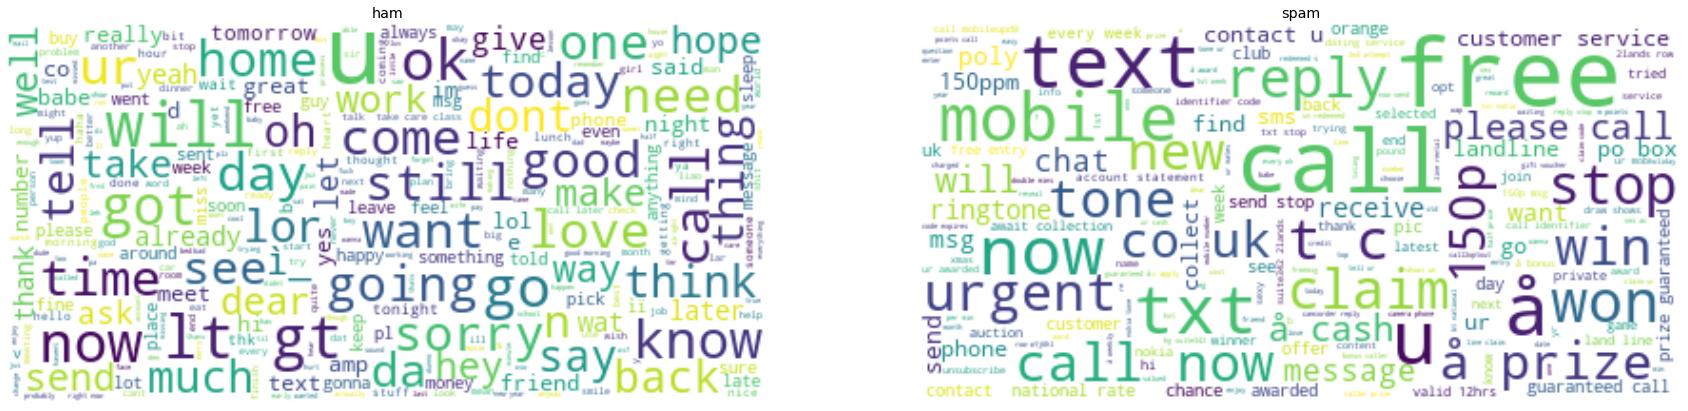

After Cleaning Data


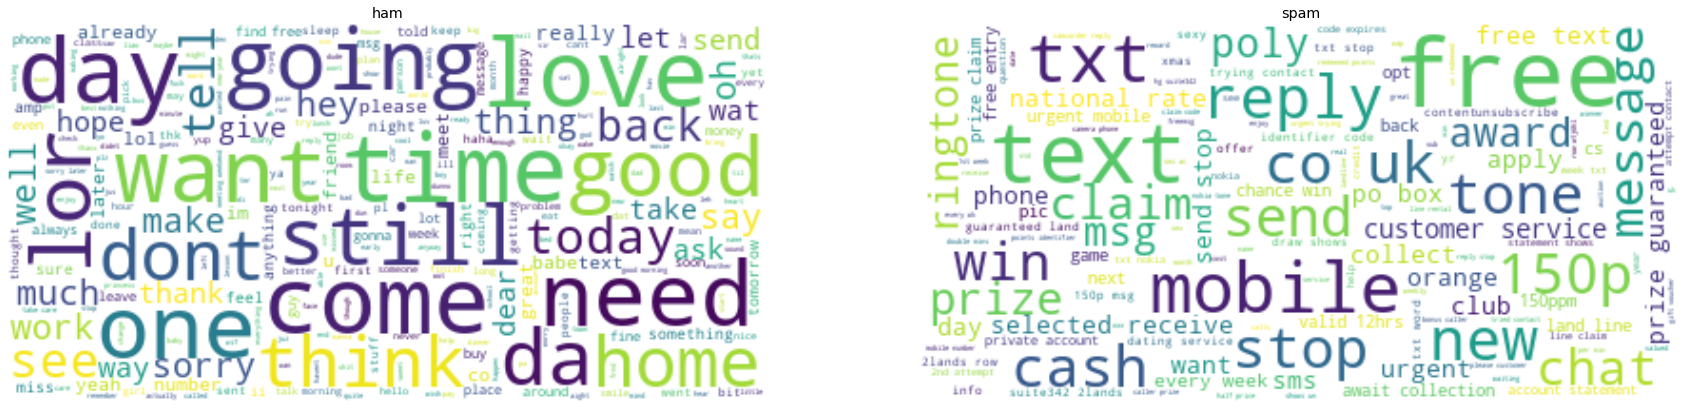

ham ['good', 'like', 'come', 'day', 'time', 'love', 'going', 'one', 'home', 'want', 'lor', 'need', 'sorry', 'da', 'still', 'today', 'see', 'later', 'dont', 'back']
spam ['free', 'txt', 'mobile', 'text', 'stop', 'claim', 'reply', 'www', 'prize', 'cash', 'uk', 'send', 'new', 'nokia', '150p', 'win', 'urgent', 'week', 'tone', 'service']


In [2]:
df = pd.read_excel("./spam_ham.xls")
df["text_lower"] = df["text"].str.lower()
print(df["spam_ham"].value_counts())
categories = {}

f, axs = plt.subplots(1,2,figsize=(30,30))
ax_counter = 0
for cat in df["spam_ham"].unique():
    categories[cat] = {"text":df[df["spam_ham"]==cat]["text_lower"].values}
    categories[cat]["merged_text_lower"] = " ".join(categories[cat]["text"])
    wordcloud = WordCloud(max_font_size=50, max_words=300, random_state=42, background_color="white").generate(categories[cat]["merged_text_lower"] )
    axs[ax_counter].imshow(wordcloud, interpolation="bilinear")
    axs[ax_counter].axis("off")
    axs[ax_counter].set_title(cat)
    ax_counter +=1
plt.show()




english_stop_words = stopwords.words('english')
words_to_add_for_example = ["u","said", "ì_","ì", 'lt',"gt","late","ur","d","yes","hi","å","l","t","g","u","d","u","&lt;#&gt;","ok","got","i'd",'get', 'go', 'know',"call"]
english_stop_words.extend(words_to_add_for_example)

def strip_accents(s):
    
    _RE_COMBINE_WHITESPACE = re.compile(r"\s+")
    pattern = "["+string.punctuation.replace(".","").replace("@","")+"]"

    s = _RE_COMBINE_WHITESPACE.sub(" ", re.sub(pattern, " ", s) ).strip()
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

print("After Cleaning Data")

f, axs = plt.subplots(1,2,figsize=(30,30))
ax_counter = 0
for cat in df["spam_ham"].unique(): 
    # Easier way is to take all the string concatenate them them merge ;) (And not to split thne merge)
    categories[cat]["tokenized_lower_text"] = strip_accents(categories[cat]["merged_text_lower"]).split(" ")
    categories[cat]["harmonized_cleaned_text"] = " ".join([elt for elt in categories[cat]["tokenized_lower_text"] if(elt not in english_stop_words and len(elt)>1)])
    wordcloud = WordCloud(max_font_size=50, max_words=300, random_state=42, background_color="white").generate(categories[cat]["harmonized_cleaned_text"])
    axs[ax_counter].imshow(wordcloud, interpolation="bilinear")
    axs[ax_counter].axis("off")
    axs[ax_counter].set_title(cat)
    ax_counter +=1
plt.show()

for cat in df["spam_ham"].unique(): 
    categories[cat]["20_most_commun"] = [elt[0] for elt in collections.Counter(categories[cat]["harmonized_cleaned_text"].split()).most_common(20)]
    print(cat, categories[cat]["20_most_commun"])


# Modeling 

### Train Test split

1. Use Sklearn Train test split and LabelEncoder and set test size to 20% (Do not forget to stratify)


In [3]:
le = preprocessing.LabelEncoder()
df["spam_ham_encoded"] = le.fit_transform(df["spam_ham"].values)
print(le.classes_)
X_train, X_test, y_train, y_test = train_test_split(df["text_lower"] , df["spam_ham_encoded"] , test_size=0.2, shuffle=True, stratify=df["spam_ham_encoded"]  ,random_state=42)

['ham' 'spam']


### Naive Model

1. Construct a function which take a sentence and compute the percentage of words which are in each category of your dictionary. 
2. Add a post-processing code to return the class of the category return by the function (If it return the same weight choose ramdomly a class)
3. Add a ponderation with the position of the word in the category dictionary
4. Test your Model (Fucntion on the test data) then compute the accuracy. What do you think ? 

In [4]:
def get_naive_pred_per_class(s):
    s = s.lower() #Setting string to lower
    s = strip_accents(s).split() #Generated Tokens of with a normal format
    s = [elt for elt in  s if(elt not in english_stop_words and len(elt)>1) ] # Cleaning data from stop words and removing words with legnth 1

    spam_likelihood_words = categories["spam"]["20_most_commun"]
    ham_likelihood_words = categories["ham"]["20_most_commun"]
    
    score_ham, score_spam = 0,0
    
    for word in s:
        if(word in spam_likelihood_words):
            score_spam+= (20-spam_likelihood_words.index(word)) # For the fist code just replace with 1
        elif(word in ham_likelihood_words):
            score_ham+= (20-ham_likelihood_words.index(word)) # For the fist code just replace with 1
            
    if(score_ham<score_spam):
        return "spam"
    elif(score_ham>score_spam):
        return 'ham'
    
    random.seed(42) #Reproductibility
    return  random.choice(["spam","ham"])
    
y_test_pred = le.transform([get_naive_pred_per_class(x) for x in X_test])
print(accuracy_score(y_test,y_test_pred)) #Barely greater than Random (50%) This model is better than ramdom but it as a bad model. We will use it as a baseline model

0.5300448430493273
